<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Collection" data-toc-modified-id="Data-Collection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Collection</a></span></li><li><span><a href="#Data-Transformation" data-toc-modified-id="Data-Transformation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Transformation</a></span></li><li><span><a href="#Pair-Trading-Algorithm" data-toc-modified-id="Pair-Trading-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pair Trading Algorithm</a></span></li></ul></div>

# Pair Trading Exploration   

Some of the code accompanying my paper [Testing the Profitability of Pair Trading Using Martingales](https://drive.google.com/file/d/1oxSRg1nZ2KVtDra1t8HCSj7A8VFCvCO7/view?usp=sharing) is presented in this notebook. Plans to continue working on this project are in store.  

## Data Collection

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import requests
import bs4 as bs #beautiful soup scraping library 
import pickle #serializes any python object 
import datetime as dt
import os #to create new directories
import pandas_datareader.data as pdr  
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.optimize as spop

In [2]:
yf.pdr_override()

def save_sp500_tickers():
    """Scrapes the list of S&P 500 tickers from the wiki table found in 
    https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"""
    
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers


def get_data_from_yahoo(reload_sp500=False):
    """Loops through the S&P 500 tickers and pulls (Open, High, Low, Close, Adj Close, Volume) data
    from Yahoo Finance for each ticker"""
    
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    start = dt.datetime(2000, 1, 1)
    end = dt.datetime.now() 
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


save_sp500_tickers()
get_data_from_yahoo()

MMM
[*********************100%***********************]  1 of 1 completed
ABT
[*********************100%***********************]  1 of 1 completed
ABBV
[*********************100%***********************]  1 of 1 completed
ABMD
[*********************100%***********************]  1 of 1 completed
ACN
[*********************100%***********************]  1 of 1 completed
ATVI
[*********************100%***********************]  1 of 1 completed
ADBE
[*********************100%***********************]  1 of 1 completed
AMD
[*********************100%***********************]  1 of 1 completed
AAP
[*********************100%***********************]  1 of 1 completed
AES
[*********************100%***********************]  1 of 1 completed
AFL
[*********************100%***********************]  1 of 1 completed
A
[*********************100%***********************]  1 of 1 completed
APD
[*********************100%***********************]  1 of 1 completed
AKAM
[*********************100%******************

[*********************100%***********************]  1 of 1 completed
C
[*********************100%***********************]  1 of 1 completed
CFG
[*********************100%***********************]  1 of 1 completed
CTXS
[*********************100%***********************]  1 of 1 completed
CLX
[*********************100%***********************]  1 of 1 completed
CME
[*********************100%***********************]  1 of 1 completed
CMS
[*********************100%***********************]  1 of 1 completed
KO
[*********************100%***********************]  1 of 1 completed
CTSH
[*********************100%***********************]  1 of 1 completed
CL
[*********************100%***********************]  1 of 1 completed
CMCSA
[*********************100%***********************]  1 of 1 completed
CMA
[*********************100%***********************]  1 of 1 completed
CAG
[*********************100%***********************]  1 of 1 completed
COP
[*********************100%***********************] 

[*********************100%***********************]  1 of 1 completed
HIG
[*********************100%***********************]  1 of 1 completed
HAS
[*********************100%***********************]  1 of 1 completed
HCA
[*********************100%***********************]  1 of 1 completed
PEAK
[*********************100%***********************]  1 of 1 completed
HSIC
[*********************100%***********************]  1 of 1 completed
HSY
[*********************100%***********************]  1 of 1 completed
HES
[*********************100%***********************]  1 of 1 completed
HPE
[*********************100%***********************]  1 of 1 completed
HLT
[*********************100%***********************]  1 of 1 completed
HOLX
[*********************100%***********************]  1 of 1 completed
HD
[*********************100%***********************]  1 of 1 completed
HON
[*********************100%***********************]  1 of 1 completed
HRL
[*********************100%***********************

[*********************100%***********************]  1 of 1 completed
NWS
[*********************100%***********************]  1 of 1 completed
NEE
[*********************100%***********************]  1 of 1 completed
NLSN
[*********************100%***********************]  1 of 1 completed
NKE
[*********************100%***********************]  1 of 1 completed
NI
[*********************100%***********************]  1 of 1 completed
NSC
[*********************100%***********************]  1 of 1 completed
NTRS
[*********************100%***********************]  1 of 1 completed
NOC
[*********************100%***********************]  1 of 1 completed
NLOK
[*********************100%***********************]  1 of 1 completed
NCLH
[*********************100%***********************]  1 of 1 completed
NRG
[*********************100%***********************]  1 of 1 completed
NUE
[*********************100%***********************]  1 of 1 completed
NVDA
[*********************100%*********************

[*********************100%***********************]  1 of 1 completed
TSCO
[*********************100%***********************]  1 of 1 completed
TT
[*********************100%***********************]  1 of 1 completed
TDG
[*********************100%***********************]  1 of 1 completed
TRV
[*********************100%***********************]  1 of 1 completed
TRMB
[*********************100%***********************]  1 of 1 completed
TFC
[*********************100%***********************]  1 of 1 completed
TWTR
[*********************100%***********************]  1 of 1 completed
TYL
[*********************100%***********************]  1 of 1 completed
TSN
[*********************100%***********************]  1 of 1 completed
UDR
[*********************100%***********************]  1 of 1 completed
ULTA
[*********************100%***********************]  1 of 1 completed
USB
[*********************100%***********************]  1 of 1 completed
UAA
[*********************100%**********************

## Data Transformation 

In [3]:
# compiling all data into one dataframe whose columns are adjusted closes for all the tickers   

def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)
        
        df.rename(columns = {'Adj Close':ticker}, inplace=True)
        df.drop(['Open','High','Low','Close','Volume'], 1, inplace=True)
        
        if main_df.empty:
            main_df = df
        else: 
            main_df = main_df.join(df, how='outer')
        
        if count % 10 == 0: # keeps track of where we are at while it runs  
            print(count)
    
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  26.960115  9.418209   NaN  18.25000  NaN  1.221640  16.274673   
2000-01-04  25.888859  9.149118   NaN  17.81250  NaN  1.184479  14.909398   
2000-01-05  26.638729  9.132301   NaN  18.00000  NaN  1.189124  15.204172   
2000-01-06  28.781261  9.451843   NaN  18.03125  NaN  1.165900  15.328289   
2000-01-07  29.352608  9.552753   NaN  17.93750  NaN  1.198414  16.072985   

               AMD  AAP        AES  ...  WLTW  WYNN       XEL       XLNX  XYL  \
Date                                ...                                         
2000-01-03  15.500  NaN  27.468864  ...   NaN   NaN  7.497597  33.014008  NaN   
2000-01-04  14.625  NaN 

Having compiled the data consisting of all the adjusted close prices for the constituents of the S&P 500 index, the pair selection phase can be implemented. Due to time constraints, this part was not included in the paper.

## Pair Trading Algorithm 

A thorough walk through of the pair trading strategy and algorithm is provided in the paper. Below the code for the algorithm is presented along with a settings function which can pass different parameters to the simulation.  

In [4]:
# Global variable that can be accessed and modified within any function
# Uninitialized with any values, must be initialized first using initStrategySettings
# Any other user-dependent parameters should be added here
strategySettings = {} 

def initStrategySettings(window=21, confidence=0.437, betaLoading=0, fee=0.0001, entry=0.02, 
                         stopLoss=-0.05, market='^GSPC'):
    # Any other user-dependent parameters should be appended to strategySettings here
    # They must also be passed as input with their default values to this function
    strategySettings["window"] = window
    strategySettings["confidence"] = confidence
    strategySettings["betaLoading"] = betaLoading
    strategySettings["fee"] = fee
    strategySettings["entry"] = entry
    strategySettings["stopLoss"] = stopLoss
    strategySettings["market"] = market

In [5]:
initStrategySettings()

In [6]:
def simulate_trading(start, end, tickers):
    
    signal = 0 # (0:in cash), (1:long stock A,short stock B), (2:short stock A, long stock B)
    current_return = 0 #current return in position 
    position0 = 0 # need if we have beta rotation 
    position1 = 0 # need if we have beta rotation 
    
    # initialising arrays
    gross_returns = np.array([])
    net_returns = np.array([])
    market_returns = np.array([])
    signals = np.array([]) # to keep track of when we are in and out of a postion 
    KPSS_stats = np.array([]) # to keep track how well the pair is cointegrated 
    raw_data = pd.DataFrame() # to get yahoo finance data 
    
    # downloading price data for stocks and the market index
    for ticker in tickers:
        raw_data[ticker] = yf.download(ticker, start, end)['Close']
    raw_data[strategySettings["market"]] = yf.download(strategySettings["market"], start, end)['Close']

    # moving in a loop through the sample
    for t in range(strategySettings["window"], len(raw_data)-1): 
    # len(raw_data)-1 to account for the fact we do not know the close price until the next day
        old_signal = signal
        old_position0 = position0
        old_position1 = position1   
        #specifying the subsample
        data = raw_data[t-strategySettings["window"]:t] 
        # chop up our data to account for the 21 day rolling window 
        
        # dynamic equillibrium relationship betweeen two stock prices: stock_2 = a + b*stock_1  
        
        # OLS parameters as starting values
        reg = sm.OLS(np.array(data[tickers[1]]), sm.add_constant(np.array(data[tickers[0]]))) 
        res = reg.fit()
        a0 = res.params[0] # initial a value for the dynamic equillibrium relationship 
        b0 = res.params[1] # initial b value for the dynamic equillibrium relationship 
        
        # defining the KPSS function (unbiased one-parameter forecast)
        def KPSS(b):
            a = np.average(data[tickers[1]] - b*data[tickers[0]])
            resid = np.array(data[tickers[1]] - (a + b*data[tickers[0]]))
            cum_resid = np.cumsum(resid)
            st_error = (np.sum(resid**2)/(len(resid)-2))**(1/2)
            KPSS = np.sum(cum_resid**2)/(len(resid)**2*st_error**2)
            return KPSS
        
        # minimizing the KPSS function (maximizing the stationarity)
        res = spop.minimize(KPSS, b0, method='Nelder-Mead') 
        # condider method='Powell' for higher performance but slower algo
        KPSS_opt = res.fun #function value from optimization result 
        # retrieving optimal parameters
        b_opt = float(res.x) 
        a_opt = np.average(data[tickers[1]] - b_opt*data[tickers[0]]) 
        
        # simulating trading
        if current_return < strategySettings["stopLoss"]: #first check whether stop-loss is violated
            signal = 0
            print('stop-loss triggered')
        # if already in position, check whether the equilibrium is restored, 
        # continue in position if not
        elif np.sign(raw_data[tickers[1]][t] - (a_opt + b_opt*raw_data[tickers[0]][t])) == old_signal:
            signal = old_signal
        else:
            # only trade if the pair is cointegrated
            if KPSS_opt > strategySettings["confidence"]:
                signal = 0
            # only trade if there are large enough profit opportunities (optimal entry)
            elif abs(raw_data[tickers[1]][t]/\
                     (a_opt + b_opt*raw_data[tickers[0]][t])-1) < strategySettings["entry"]:
                signal = 0
            else:
                signal = np.sign(raw_data[tickers[1]][t] - (a_opt + b_opt*raw_data[tickers[0]][t]))
        
        # calculate strategy returns with beta loading
        if strategySettings["betaLoading"] == 1:
            rets0 = np.array(raw_data[tickers[0]][t-strategySettings["window"]:t-1])/\
            np.array(raw_data[tickers[0]][t-strategySettings["window"]+1:t]) - 1
            rets1 = np.array(raw_data[tickers[1]][t-strategySettings["window"]:t-1])/\
            np.array(raw_data[tickers[1]][t-strategySettings["window"]+1:t]) - 1
            rets_mkt = np.array(raw_data[strategySettings["market"]][t-window:t-1])/\
            np.array(raw_data[strategySettings["market"]][t-window+1:t]) - 1
            reg = sm.OLS(rets0, sm.add_constant(rets_mkt))
            res = reg.fit()
            beta0 = res.params[1]
            reg = sm.OLS(rets1, sm.add_constant(rets_mkt))
            res = reg.fit()
            beta1 = res.params[1]
            position0 = beta1*signal
            position1 = -beta0*signal
        # calculate strategy returns without beta loading
        else:
            position0 = signal 
            position1 = -signal
        
        # calculating returns
        gross = position0*(raw_data[tickers[0]][t+1]/raw_data[tickers[0]][t] - 1) +\
        position1*(raw_data[tickers[1]][t+1]/raw_data[tickers[1]][t] - 1)
        net = gross - strategySettings["fee"]*(abs(position0 - old_position0) +\
                                               abs(position1 - old_position1))
        market = raw_data[strategySettings["market"]][t+1]/raw_data[strategySettings["market"]][t]- 1
        if signal == old_signal:
            current_return = (1+current_return)*(1+gross)-1
        else:
            current_return = gross
        # populating arrays
        KPSS_stats = np.append(KPSS_stats, KPSS_opt)
        signals = np.append(signals, signal)
        gross_returns = np.append(gross_returns, gross)
        net_returns = np.append(net_returns, net)
        market_returns = np.append(market_returns, market)
        
    # building the output dataframe
    output = pd.DataFrame()
    output['KPSS'] = KPSS_stats
    output['signal'] = signals
    output['gross'] = gross_returns
    output['net'] = net_returns
    output['market'] = market_returns
    
    # visualising the results 
    fig, ax = plt.subplots()
    # fig.suptitle('(XOM,CVX) equity curve from Jan 2000 to Dec 2021')
    ax.plot(np.append(1,np.cumprod(1+gross_returns)))
    ax.plot(np.append(1,np.cumprod(1+net_returns)))
    ax.plot(np.append(1,np.cumprod(1+market_returns)))
    plt.xlabel('Trading Day')
    plt.ylabel('Return')
    plt.legend(['gross return','net returns','market return'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered
stop-loss triggered


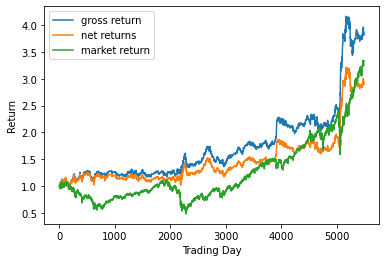

In [7]:
simulate_trading('2000-01-01', '2021-12-01', ['XOM', 'CVX']) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


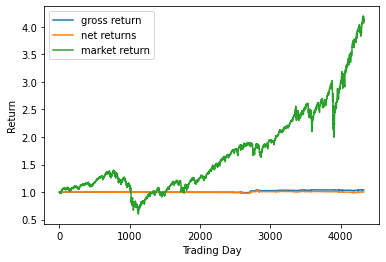

In [8]:
simulate_trading('2000-01-01', '2021-12-01', ['GOOG', 'GOOGL'])

Call initStrategySettings() with your desired parameters to tweak the default parameters mentioned below. <br> 
<br>
window=21, a 21 day rolling window for finding the dynamic equilibrium on a particular trading day. <br> 
<br>
confidence=0.437, default 95% KPSS p-value (p-value closer to 0 implies a stronger stationarity requirement). <br> 
<br>
90% KPSS p-value: 0.347 <br>
95% KPSS p-value: 0.463 <br>
97.5% KPSS p-value: 0.574 <br>
99% KPSS p-value: 0.739 <br> 
<br>
betaLoading=0, set to 1 for stocks in the pair to be weighted in proportion to their reverse betas to achieve higher market 
<br>
neutrality. <br>
<br>
fee=0.0001, 1 basis point (0.01%) is the default fee <br>
<br>
entry=0.02, from each trade a minimum gain of 2% is expected <br>
<br>
stopLoss=-0.05, exits position when the return of an open position falls below -5% <br>
<br>
market='^GSPC', the S&P 500 is used as the benchmark for the market